In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

import pandas as pd

df = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\BN1.0_samples_100000.csv", encoding="utf-8")
df.head()

,Gender,AgeGroup,Industry,CorpSize,EmploymentType,LegalOrganization,Sector,IncomeLevel
0,MALES,18 to 20 years,"Agriculture, forestry and fishing",Fewer than 5 employees,Unincorporated Private sector entities,Households,Other services,90-110k
1,FEMALES,15 to 17 years,Accommodation and food services,Fewer than 5 employees,Unincorporated Private sector entities,Households,Other services,70-90k
2,MALES,18 to 20 years,"Agriculture, forestry and fishing",20–199 employees,Public sector entities,Households,Other services,110-130k
3,MALES,18 to 20 years,Accommodation and food services,20–199 employees,Public sector entities,Households,Other services,90-110k
4,FEMALES,75 to 79 years,Arts and recreation services,5–19 employees,Unincorporated Private sector entities,Non-profit institutions serving households,Other services,110-130k


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Gender             100000 non-null  object
 1   AgeGroup           100000 non-null  object
 2   Industry           100000 non-null  object
 3   CorpSize           100000 non-null  object
 4   EmploymentType     100000 non-null  object
 5   LegalOrganization  100000 non-null  object
 6   Sector             100000 non-null  object
 7   IncomeLevel        100000 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
# 设置样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

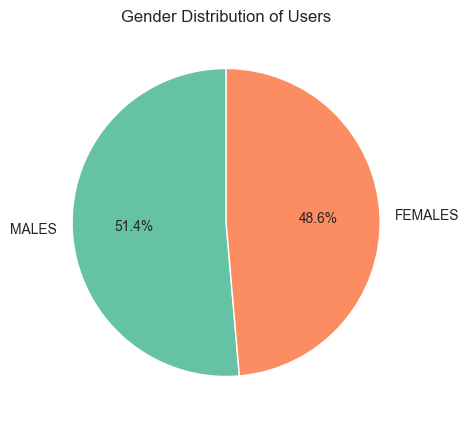

In [7]:
# Plot1.性别分布饼图
def show_gender_distribution(df):
    gender_counts = df['Gender'].value_counts()
    
    plt.figure(figsize=(8, 5))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette("Set2")[:2])
    plt.title('Gender Distribution of Users')
    plt.show()
show_gender_distribution(df)

In [8]:
df['AgeGroup'].unique()

array(['18 to 20 years', '15 to 17 years', '75 to 79 years',
       '14 years and under', '85 years and over', '80 to 84 years'],
      dtype=object)

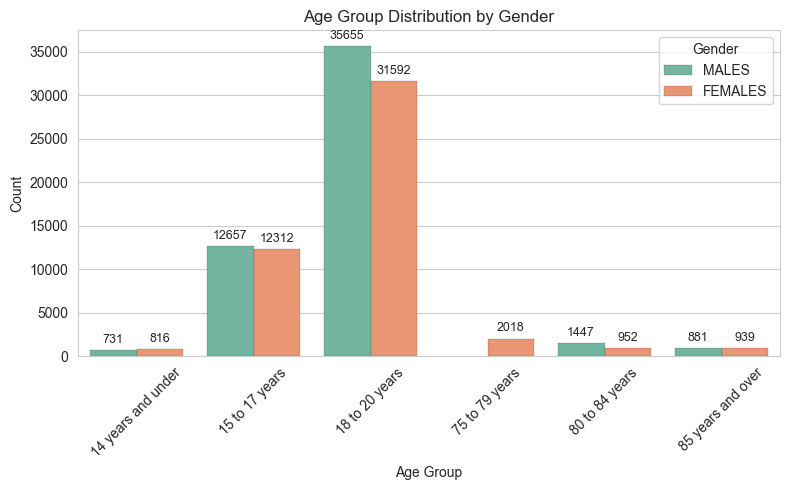

In [9]:
# Plot2.性别+年龄分组条形图
def show_age_gender_distribution(df):
    age_order = ['14 years and under', '15 to 17 years', '18 to 20 years', 
                 '75 to 79 years', '80 to 84 years', '85 years and over']
    
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")
    sns.countplot(data=df, x='AgeGroup', hue='Gender', order=age_order, 
                  palette="Set2", edgecolor='black', linewidth=0.1)
    
    plt.title('Age Group Distribution by Gender')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.xticks(rotation=45)
    
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3, fontsize=9)
    
    plt.tight_layout()
    plt.show()

show_age_gender_distribution(df)

In [10]:
df['Industry'].value_counts()

Industry
Accommodation and food services      70546
Agriculture, forestry and fishing    20875
Arts and recreation services          8579
Name: count, dtype: int64

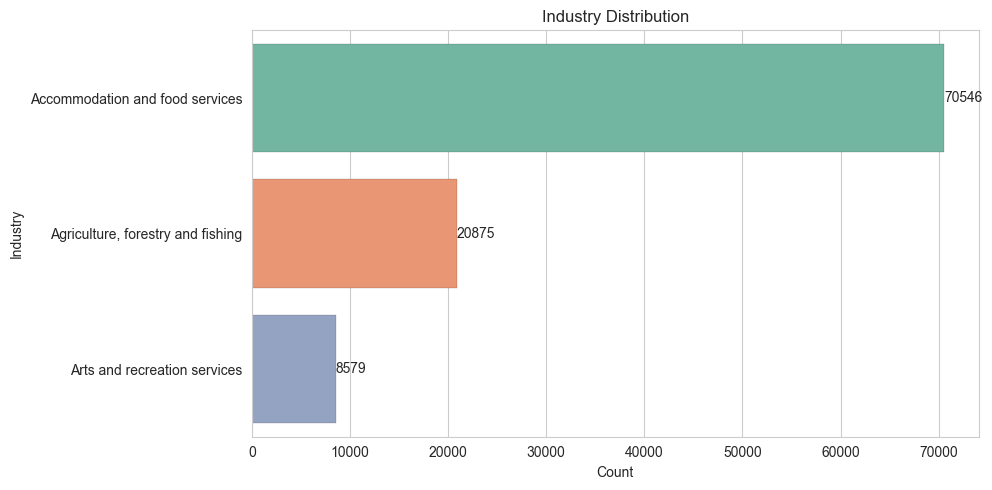

In [11]:
# Plot3.行业分布竖向柱状图
def show_industry_distribution(df):
    industry_counts = df['Industry'].value_counts()
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=industry_counts.values, y=industry_counts.index, legend=False, palette="Set2", 
                edgecolor='black', linewidth=0.1)
    
    plt.title(f'Industry Distribution')
    plt.xlabel('Count')
    plt.ylabel('Industry')
    
    ax = plt.gca()
    for i, v in enumerate(industry_counts.values):
        ax.text(v + 0.1, i, str(v), va='center')
    
    plt.tight_layout()
    plt.show()
show_industry_distribution(df)

<Figure size 800x500 with 0 Axes>

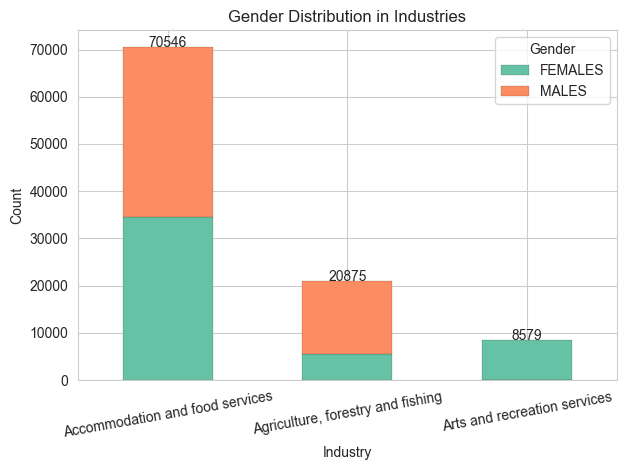

In [12]:
# Plot4.性别和行业分布的堆叠条形图
def show_gender_industry_stacked(df):

    industries = df['Industry'].value_counts().index
    
    cross_tab = pd.crosstab(df[df['Industry'].isin(industries)]['Industry'], 
                           df['Gender'])
    
    cross_tab['Total'] = cross_tab.sum(axis=1)
    cross_tab = cross_tab.sort_values('Total', ascending=False).drop('Total', axis=1)
    
    plt.figure(figsize=(8, 5))
    colors = sns.color_palette("Set2", n_colors=len(cross_tab.columns))
    cross_tab.plot(kind='bar', stacked=True, color=colors,
                   edgecolor='black', linewidth=0.1)
    
    plt.title(f'Gender Distribution in Industries')
    plt.xlabel('Industry')
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.xticks(rotation=10, ha='center')
    
    ax = plt.gca()
    for i, (idx, row) in enumerate(cross_tab.iterrows()):
        total = row.sum()
        ax.text(i, total + 5, str(total), ha='center')
    
    plt.tight_layout()
    plt.show()
show_gender_industry_stacked(df)

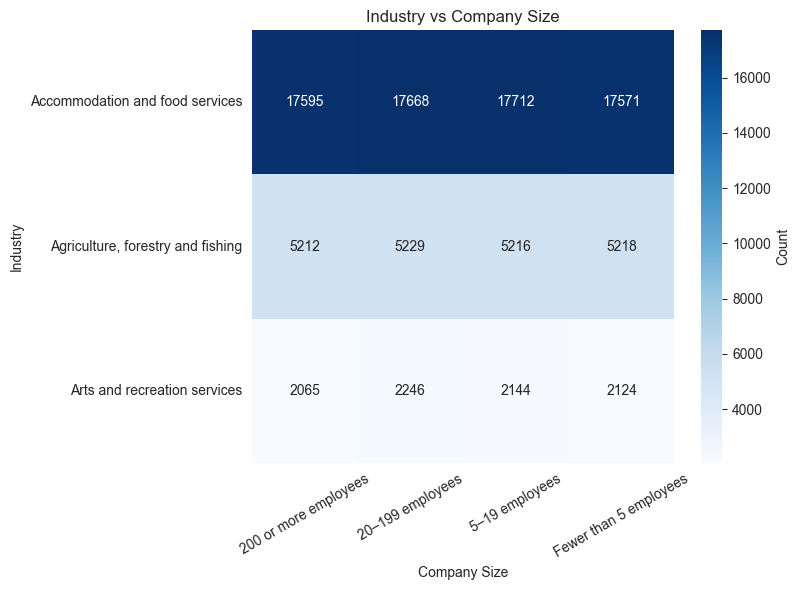

In [13]:
# Plot5.行业+公司规模热力图
def show_industry_corp_size_heatmap(df):
    industries_list = df['Industry'].value_counts().index
    
    cross_tab = pd.crosstab(df[df['Industry'].isin(industries_list)]['Industry'], 
                           df['CorpSize'])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', 
                cbar_kws={'label': 'Count'})
    plt.title(f'Industry vs Company Size')
    plt.xlabel('Company Size')
    plt.xticks(rotation=30)

    plt.ylabel('Industry')
    plt.tight_layout()
    plt.show()
show_industry_corp_size_heatmap(df)

In [14]:
df['IncomeLevel'].unique()

array(['90-110k', '70-90k', '110-130k', '30-50k', '20-30k', '<10k',
       '10-20k', '>150k', '130-150k', '50-70k'], dtype=object)

In [15]:
# 收入区间转换为数值
income_map = {
        '<10k': 5, '10-20k': 15, 
        '20-30k': 25, '30-50k': 40,
        '50-70k': 60, '70-90k': 80, 
        '90-110k': 100, '110-130k': 120,
        '130-150k': 140, '>150k': 160
    }
df['IncomeNumeric'] = df['IncomeLevel'].map(income_map)

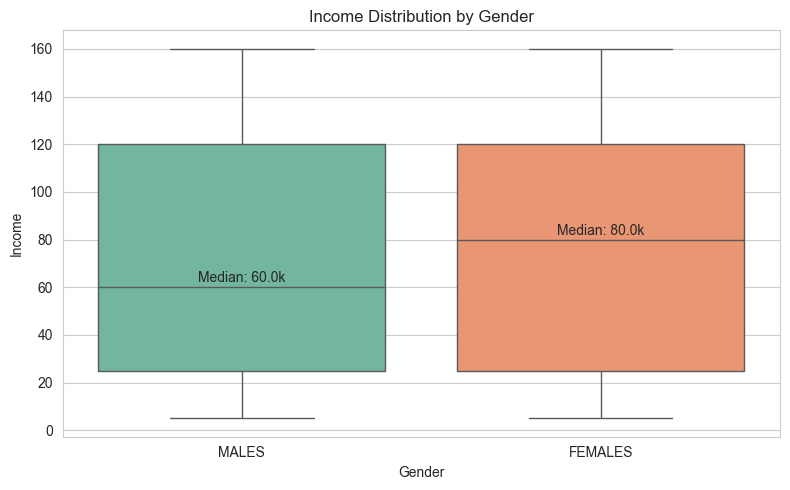

In [16]:
# Plot6.性别+收入分组箱线图
def show_income_by_gender(df):
    
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")
    sns.boxplot(data=df, x='Gender', y='IncomeNumeric', 
                palette={'MALES': '#66c2a5', 'FEMALES':'#fc8d62'})
    
    plt.title('Income Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Income')
    
    ax = plt.gca()
    for i, gender in enumerate(df['Gender'].unique()):
        median_income = df[df['Gender'] == gender]['IncomeNumeric'].median()
        ax.text(i, median_income + 2, f'Median: {median_income}k', 
                ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
show_income_by_gender(df)

In [17]:
palette={'MALES': '#66c2a5', 'FEMALES':'#fc8d62'}

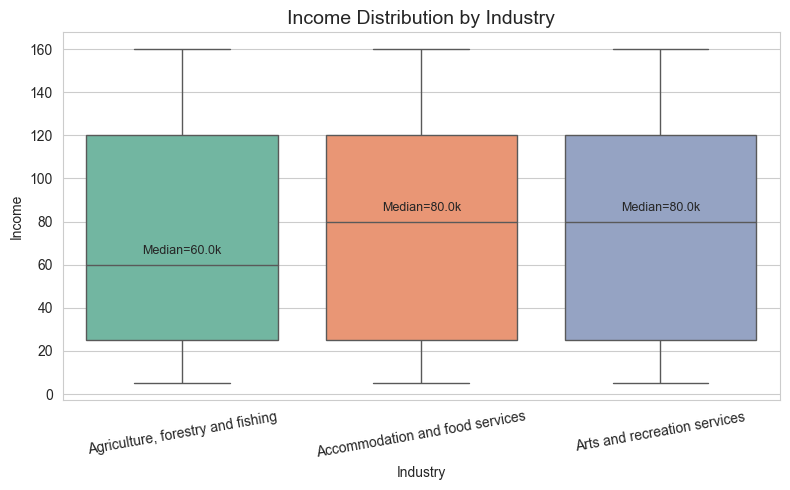

In [18]:
# Plot7.行业+收入分组箱线图
def show_income_by_gender(df):
    
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")

    industries_list = df['Industry'].unique()
    industry_df = df[df['Industry'].isin(industries_list)]
    sns.boxplot(data=industry_df, x='Industry', y='IncomeNumeric',
               palette="Set2",)
    plt.title(f'Income Distribution by Industry', fontsize=14)
    plt.xlabel('Industry')
    plt.xticks(rotation=10, ha='center')
    plt.ylabel('Income')
    
    industry_counts = industry_df['Industry'].value_counts()
    ax = plt.gca()
    for i, industry in enumerate(industries_list):
        median_income = industry_df[industry_df['Industry'] == industry]['IncomeNumeric'].median()
        ax.text(i, median_income + 5, f'Median={median_income}k', ha='center', fontsize=9, )
    
    plt.tight_layout()
    plt.show()
show_income_by_gender(df)

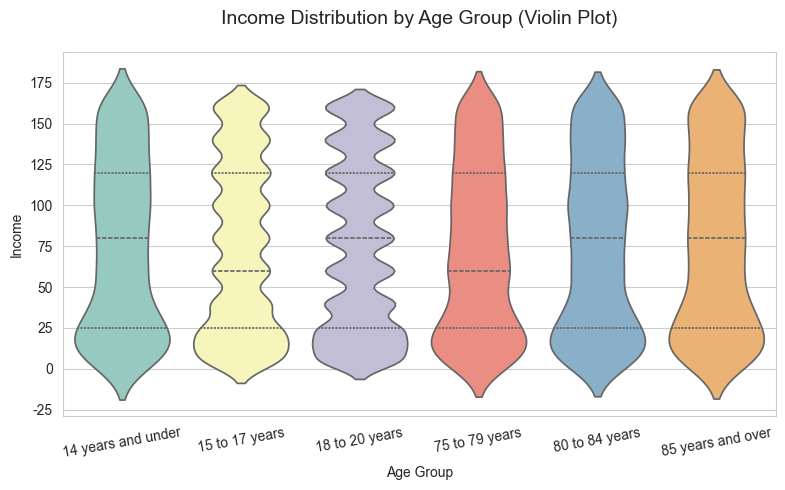

In [19]:
# Plot8.收入和年龄组的小提琴图
def show_income_by_agegroup(df):
    age_order = ['14 years and under', '15 to 17 years', '18 to 20 years', 
                 '75 to 79 years', '80 to 84 years', '85 years and over']
    
    plt.figure(figsize=(8, 5))
    
    sns.violinplot(data=df, x='AgeGroup', y='IncomeNumeric', order=age_order,
                   palette='Set3', inner="quartile")
    
    plt.title('Income Distribution by Age Group (Violin Plot)', 
              fontsize=14, pad=20)
    plt.xlabel('Age Group')
    plt.ylabel('Income')
    plt.xticks(rotation=10, ha='center')
    
    plt.tight_layout()
    plt.show()
show_income_by_agegroup(df)